In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
import pandas as pd
import csv
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

In [3]:
data = ascii.read('ASTR19_S22_group_project_data.txt') #read in the file
df = data.to_pandas()
df = df.iloc[:, 1:] #remove the first column
df.columns = ['X','Y']
#print(df) #print the data

for index, row in df.iterrows():
    print(f"X: {row['X']}, Y: {row['Y']}")  #define the X and Y 

X: 8:07, Y: 6.57
X: 15:37, Y: -0.39
X: 8:55, Y: 5.38
X: 16:25, Y: -1.74
X: 9:45, Y: 5.26
X: 17:14, Y: -1.36
X: 10:35, Y: 4.13
X: 18:00, Y: -1.15
X: 11:28, Y: 3.48
X: 18:46, Y: -1.61
X: 12:22, Y: 2.62
X: 19:31, Y: 0.05
X: 13:24, Y: 1.83
X: 20:16, Y: 1.01
X: 3:22, Y: 3.57
X: 21:01, Y: 0.73
X: 4:07, Y: 4.54
X: 21:46, Y: 2.17
X: 4:50, Y: 3.76
X: 11:58, Y: 2.88
X: 5:31, Y: 3.9
X: 12:56, Y: 1.92
X: 6:08, Y: 4.73
X: 13:45, Y: 1.74
X: 6:47, Y: 5.66
X: 14:25, Y: 0.79
X: 7:22, Y: 5.33
X: 15:00, Y: -0.04
X: 7:59, Y: 5.23
X: 15:34, Y: -1.12
X: 8:34, Y: 6.67
X: 16:08, Y: -0.61
X: 9:10, Y: 4.74
X: 16:41, Y: -0.93
X: 9:45, Y: 4.69
X: 17:12, Y: -1.29
X: 10:21, Y: 4.2
X: 17:45, Y: 0.22
X: 10:57, Y: 3.68
X: 18:15, Y: 0.26
X: 11:38, Y: 2.47
X: 18:48, Y: 0.36
X: 12:25, Y: 2.59
X: 19:20, Y: 0.99
X: 2:22, Y: 4.1
X: 19:52, Y: 1.87
X: 2:58, Y: 3.17
X: 20:30, Y: 1.6
X: 3:37, Y: 3.71
X: 10:44, Y: 3.1
X: 4:23, Y: 4.04
X: 11:55, Y: 2.49
X: 5:15, Y: 4.07
X: 12:57, Y: 2.18
X: 6:09, Y: 5.93
X: 13:50, Y: 0.7
X: 7:05,

In [4]:
X = ['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25','19:20', '2:22','19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09','13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19','18:12', '12:10','18:49','1:32','19:24','2:13','20:00','2:54','9:54','3:39','11:15','4:29','12:22','5:21','13:14']

def time_to_decimal(time):  #make the time data plottable 
    hours, minutes = map(int, time.split(':'))
    return hours + (minutes / 60)

X_decimal = [time_to_decimal(time) for time in X]
n = 5

#print(X_decimal)

X = [8.116666666666667, 15.616666666666667, 8.916666666666666, 16.416666666666668, 9.75, 17.233333333333334, 10.583333333333334, 18.0, 11.466666666666667, 18.766666666666666, 12.366666666666667, 19.516666666666666, 13.4, 20.266666666666666, 3.3666666666666667, 21.016666666666666, 4.116666666666666, 21.766666666666666, 4.833333333333333, 11.966666666666667, 5.516666666666667, 12.933333333333334, 6.133333333333334, 13.75, 6.783333333333333, 14.416666666666666, 7.366666666666666, 15.0, 7.983333333333333, 15.566666666666666, 8.566666666666666, 16.133333333333333, 9.166666666666666, 16.683333333333334, 9.75, 17.2, 10.35, 17.75, 10.95, 18.25, 11.633333333333333, 18.8, 12.416666666666666, 19.333333333333332, 2.3666666666666667, 19.866666666666667, 2.966666666666667, 20.5, 3.6166666666666667, 10.733333333333333, 4.383333333333334, 11.916666666666666, 5.25, 12.95, 6.15, 13.833333333333334, 7.083333333333333, 14.65, 7.966666666666667, 15.45, 8.833333333333334, 16.166666666666668, 9.666666666666666, 16.866666666666667, 10.5, 17.566666666666666, 11.316666666666666, 18.2, 12.166666666666666, 18.816666666666666, 1.5333333333333332, 19.4, 2.216666666666667, 20.0, 2.9, 9.9, 3.65, 11.25, 4.483333333333333, 12.366666666666667, 5.35, 13.233333333333333]

precision = 2
X_rounded = [round(x, precision) for x in X]

#print(X_rounded)

In [5]:
X_rounded = [8.12, 15.62, 8.92, 16.42, 9.75, 17.23, 10.58, 18.0, 11.47, 18.77, 12.37, 19.52, 13.4, 20.27, 3.37, 21.02, 4.12, 21.77, 4.83, 11.97, 5.52, 12.93, 6.13, 13.75, 6.78, 14.42, 7.37, 15.0, 7.98, 15.57, 8.57, 16.13, 9.17, 16.68, 9.75, 17.2, 10.35, 17.75, 10.95, 18.25, 11.63, 18.8, 12.42, 19.33, 2.37, 19.87, 2.97, 20.5, 3.62, 10.73, 4.38, 11.92, 5.25, 12.95, 6.15, 13.83, 7.08, 14.65, 7.97, 15.45, 8.83, 16.17, 9.67, 16.87, 10.5, 17.57, 11.32, 18.2, 12.17, 18.82, 1.53, 19.4, 2.22, 20.0, 2.9, 9.9, 3.65, 11.25, 4.48, 12.37, 5.35, 13.23]

X_sorted = sorted(X_rounded)

#print(X_sorted)

a = (X_sorted) #sort to determine the lowest number and the greatest number
n = len(a)
#print(n) #make sure that the x and y are the same amount of variables

In [6]:
Y = [6.57, -0.39, 5.38, -1.74, 5.26, -1.36, 4.13, -1.15, 3.48, -1.61, 2.62, 0.05, 1.83, 1.01, 3.57, 0.73, 4.54, 2.17, 3.76, 2.88, 3.90, 1.92, 4.73, 1.74, 5.66, 0.79, 5.33, -0.04, 5.23, -1.12, 6.67, -0.61, 4.74, -0.93, 4.69, -1.29, 4.20, 0.22, 3.68, 0.26, 2.47, 0.36, 2.59, 0.99, 4.10, 1.87, 3.17, 1.60, 3.71, 3.10, 4.04, 2.49, 4.07, 2.18, 5.93, 0.70, 6.89, 0.21, 6.72, 0.22, 6.77, -1.68, 5.77,-1.32, 4.35, -0.73, 4.23, -0.38, 2.24, -0.61, 3.45, -0.46, 4.13, 1.21, 3.34, 2.58, 3.32, 3.26, 5.21, 2.39, 4.83, 2.41]

Y_array = np.array(Y)

#print(Y_array)

a = (Y)
n = len(a)
print(n)

82


In [7]:
Y = [6.57, -0.39, 5.38, -1.74, 5.26, -1.36, 4.13, -1.15, 3.48, -1.61, 2.62, 0.05, 1.83, 1.01, 3.57, 0.73, 4.54, 2.17, 3.76, 2.88, 3.90, 1.92, 4.73, 1.74, 5.66, 0.79, 5.33, -0.04, 5.23, -1.12, 6.67, -0.61, 4.74, -0.93, 4.69, -1.29, 4.20, 0.22, 3.68, 0.26, 2.47, 0.36, 2.59, 0.99, 4.10, 1.87, 3.17, 1.60, 3.71, 3.10, 4.04, 2.49, 4.07, 2.18, 5.93, 0.70, 6.89, 0.21, 6.72, 0.22, 6.77, -1.68, 5.77,-1.32, 4.35, -0.73, 4.23, -0.38, 2.24, -0.61, 3.45, -0.46, 4.13, 1.21, 3.34, 2.58, 3.32, 3.26, 5.21, 2.39, 4.83, 2.41]

Inter_day = []
Intra_day = []

for i in range(len(Y)):
    if i % 2 == 0:
        Inter_day.append(Y[i])
    else:
        Intra_day.append(Y[i])

#print("Inter_day:", Inter_day)
#print("Intra_day:", Intra_day)

In [8]:
X = [8.12, 15.62, 8.92, 16.42, 9.75, 17.23, 10.58, 18.0, 11.47, 18.77, 12.37, 19.52, 13.4, 20.27, 3.37, 21.02, 4.12, 21.77, 4.83, 11.97, 5.52, 12.93, 6.13, 13.75, 6.78, 14.42, 7.37, 15.0, 7.98, 15.57, 8.57, 16.13, 9.17, 16.68, 9.75, 17.2, 10.35, 17.75, 10.95, 18.25, 11.63, 18.8, 12.42, 19.33, 2.37, 19.87, 2.97, 20.5, 3.62, 10.73, 4.38, 11.92, 5.25, 12.95, 6.15, 13.83, 7.08, 14.65, 7.97, 15.45, 8.83, 16.17, 9.67, 16.87, 10.5, 17.57, 11.32, 18.2, 12.17, 18.82, 1.53, 19.4, 2.22, 20.0, 2.9, 9.9, 3.65, 11.25, 4.48, 12.37, 5.35, 13.23]

Inter_day_time = []
Intra_day_time = []

for i in range(len(X)):
    if i % 2 == 0:
        Inter_day_time.append(X[i])
    else:
        Intra_day_time.append(X[i])
        
#print("Inter_day_time:", Inter_day_time)
#print("Intra_day_time:", Intra_day_time)

In [9]:
X_set_1 = [8.12, 8.92, 9.75, 10.58, 11.47, 12.37, 13.4, 3.37, 4.12, 4.83, 5.52, 6.13, 6.78, 7.37, 7.98, 8.57, 9.17, 9.75, 10.35, 10.95, 11.63, 12.42, 2.37, 2.97, 3.62, 4.38, 5.25, 6.15, 7.08, 7.97, 8.83, 9.67, 10.5, 11.32, 12.17, 1.53, 2.22, 2.9, 3.65, 4.48, 5.35]
X_set_2 = [15.62, 16.42, 17.23, 18.0, 18.77, 19.52, 20.27, 21.02, 21.77, 11.97, 12.93, 13.75, 14.42, 15.0, 15.57, 16.13, 16.68, 17.2, 17.75, 18.25, 18.8, 19.33, 19.87, 20.5, 10.73, 11.92, 12.95, 13.83, 14.65, 15.45, 16.17, 16.87, 17.57, 18.2, 18.82, 19.4, 20.0, 9.9, 11.25, 12.37, 13.23]

Y_set_1 = [6.57, 5.38, 5.26, 4.13, 3.48, 2.62, 1.83, 3.57, 4.54, 3.76, 3.9, 4.73, 5.66, 5.33, 5.23, 6.67, 4.74, 4.69, 4.2, 3.68, 2.47, 2.59, 4.1, 3.17, 3.71, 4.04, 4.07, 5.93, 6.89, 6.72, 6.77, 5.77, 4.35, 4.23, 2.24, 3.45, 4.13, 3.34, 3.32, 5.21, 4.83]
Y_set_2 = [-0.39, -1.74, -1.36, -1.15, -1.61, 0.05, 1.01, 0.73, 2.17, 2.88, 1.92, 1.74, 0.79, -0.04, -1.12, -0.61, -0.93, -1.29, 0.22, 0.26, 0.36, 0.99, 1.87, 1.6, 3.1, 2.49, 2.18, 0.7, 0.21, 0.22, -1.68, -1.32, -0.73, -0.38, -0.61, -0.46, 1.21, 2.58, 3.26, 2.39, 2.41]

associated_data = []
for x1, y1, x2, y2 in zip(X_set_1, Y_set_1, X_set_2, Y_set_2):
    associated_data.append(((x1, y1), (x2,y2)))

for pair in associated_data:
    print(f"Inter_day: {pair[0]} = Intra_day: {pair[1]}")

Inter_day: (8.12, 6.57) = Intra_day: (15.62, -0.39)
Inter_day: (8.92, 5.38) = Intra_day: (16.42, -1.74)
Inter_day: (9.75, 5.26) = Intra_day: (17.23, -1.36)
Inter_day: (10.58, 4.13) = Intra_day: (18.0, -1.15)
Inter_day: (11.47, 3.48) = Intra_day: (18.77, -1.61)
Inter_day: (12.37, 2.62) = Intra_day: (19.52, 0.05)
Inter_day: (13.4, 1.83) = Intra_day: (20.27, 1.01)
Inter_day: (3.37, 3.57) = Intra_day: (21.02, 0.73)
Inter_day: (4.12, 4.54) = Intra_day: (21.77, 2.17)
Inter_day: (4.83, 3.76) = Intra_day: (11.97, 2.88)
Inter_day: (5.52, 3.9) = Intra_day: (12.93, 1.92)
Inter_day: (6.13, 4.73) = Intra_day: (13.75, 1.74)
Inter_day: (6.78, 5.66) = Intra_day: (14.42, 0.79)
Inter_day: (7.37, 5.33) = Intra_day: (15.0, -0.04)
Inter_day: (7.98, 5.23) = Intra_day: (15.57, -1.12)
Inter_day: (8.57, 6.67) = Intra_day: (16.13, -0.61)
Inter_day: (9.17, 4.74) = Intra_day: (16.68, -0.93)
Inter_day: (9.75, 4.69) = Intra_day: (17.2, -1.29)
Inter_day: (10.35, 4.2) = Intra_day: (17.75, 0.22)
Inter_day: (10.95, 3.6

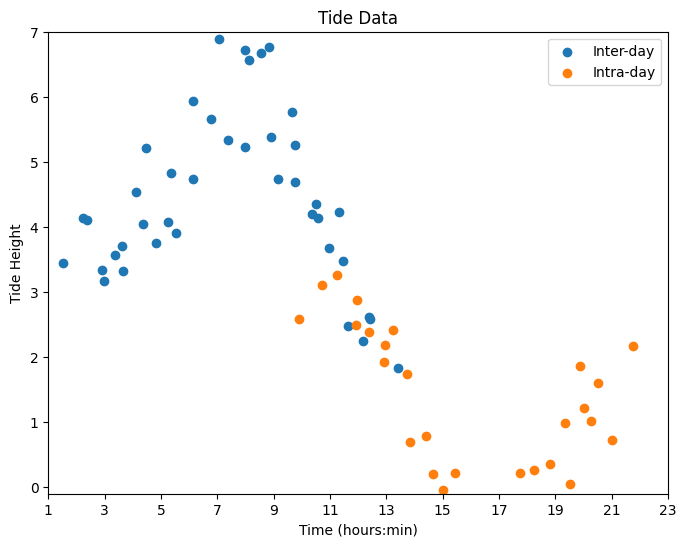

In [10]:
data_string = """
Inter_day: (8.12, 6.57) = Intra_day: (15.62, -0.39)
Inter_day: (8.92, 5.38) = Intra_day: (16.42, -1.74)
Inter_day: (9.75, 5.26) = Intra_day: (17.23, -1.36)
Inter_day: (10.58, 4.13) = Intra_day: (18.0, -1.15)
Inter_day: (11.47, 3.48) = Intra_day: (18.77, -1.61)
Inter_day: (12.37, 2.62) = Intra_day: (19.52, 0.05)
Inter_day: (13.4, 1.83) = Intra_day: (20.27, 1.01)
Inter_day: (3.37, 3.57) = Intra_day: (21.02, 0.73)
Inter_day: (4.12, 4.54) = Intra_day: (21.77, 2.17)
Inter_day: (4.83, 3.76) = Intra_day: (11.97, 2.88)
Inter_day: (5.52, 3.9) = Intra_day: (12.93, 1.92)
Inter_day: (6.13, 4.73) = Intra_day: (13.75, 1.74)
Inter_day: (6.78, 5.66) = Intra_day: (14.42, 0.79)
Inter_day: (7.37, 5.33) = Intra_day: (15.0, -0.04)
Inter_day: (7.98, 5.23) = Intra_day: (15.57, -1.12)
Inter_day: (8.57, 6.67) = Intra_day: (16.13, -0.61)
Inter_day: (9.17, 4.74) = Intra_day: (16.68, -0.93)
Inter_day: (9.75, 4.69) = Intra_day: (17.2, -1.29)
Inter_day: (10.35, 4.2) = Intra_day: (17.75, 0.22)
Inter_day: (10.95, 3.68) = Intra_day: (18.25, 0.26)
Inter_day: (11.63, 2.47) = Intra_day: (18.8, 0.36)
Inter_day: (12.42, 2.59) = Intra_day: (19.33, 0.99)
Inter_day: (2.37, 4.1) = Intra_day: (19.87, 1.87)
Inter_day: (2.97, 3.17) = Intra_day: (20.5, 1.6)
Inter_day: (3.62, 3.71) = Intra_day: (10.73, 3.1)
Inter_day: (4.38, 4.04) = Intra_day: (11.92, 2.49)
Inter_day: (5.25, 4.07) = Intra_day: (12.95, 2.18)
Inter_day: (6.15, 5.93) = Intra_day: (13.83, 0.7)
Inter_day: (7.08, 6.89) = Intra_day: (14.65, 0.21)
Inter_day: (7.97, 6.72) = Intra_day: (15.45, 0.22)
Inter_day: (8.83, 6.77) = Intra_day: (16.17, -1.68)
Inter_day: (9.67, 5.77) = Intra_day: (16.87, -1.32)
Inter_day: (10.5, 4.35) = Intra_day: (17.57, -0.73)
Inter_day: (11.32, 4.23) = Intra_day: (18.2, -0.38)
Inter_day: (12.17, 2.24) = Intra_day: (18.82, -0.61)
Inter_day: (1.53, 3.45) = Intra_day: (19.4, -0.46)
Inter_day: (2.22, 4.13) = Intra_day: (20.0, 1.21)
Inter_day: (2.9, 3.34) = Intra_day: (9.9, 2.58)
Inter_day: (3.65, 3.32) = Intra_day: (11.25, 3.26)
Inter_day: (4.48, 5.21) = Intra_day: (12.37, 2.39)
Inter_day: (5.35, 4.83) = Intra_day: (13.23, 2.41)
"""

x_inter = []
y_inter = []
x_intra = []
y_intra = []

data_lines = data_string.split("\n")
for line in data_lines:
    if line.strip():
        parts = line.split('=')
        inter_data = parts[0].split('(')[1].split(')')[0].split(',')
        intra_data = parts[1].split('(')[1].split(')')[0].split(',')
        
        x_inter.append(float(inter_data[0].strip()))
        y_inter.append(float(inter_data[1].strip()))
        x_intra.append(float(intra_data[0].strip()))
        y_intra.append(float(intra_data[1].strip()))

plt.figure(figsize=(8, 6))
plt.scatter(x_inter, y_inter, label='Inter-day')
plt.scatter(x_intra, y_intra, label='Intra-day')

plt.xlim(1, 23)
plt.xticks(range(1, 24, 2))
plt.ylim(-0.1, 7)

plt.xlabel('Time (hours:min)')
plt.ylabel('Tide Height')
plt.legend()
plt.title('Tide Data')

plt.show()

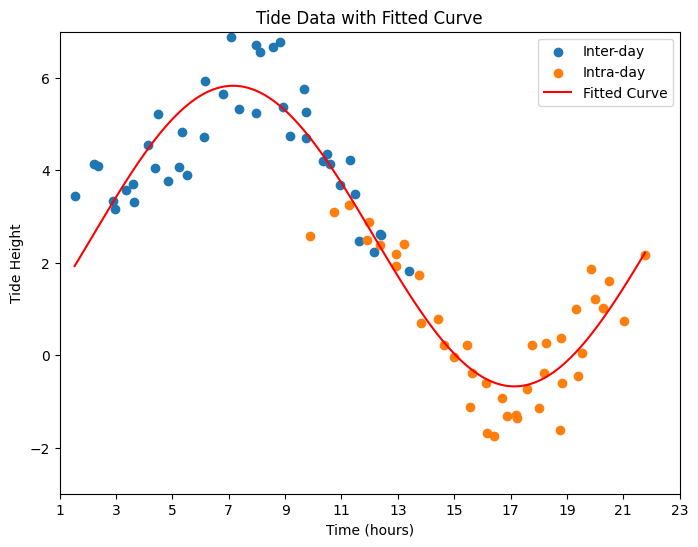

In [11]:
x_inter = [8.12, 8.92, 9.75, 10.58, 11.47, 12.37, 13.4, 3.37, 4.12, 4.83, 5.52, 6.13, 6.78, 7.37, 7.98, 8.57, 9.17, 9.75, 10.35, 10.95, 11.63, 12.42, 2.37, 2.97, 3.62, 4.38, 5.25, 6.15, 7.08, 7.97, 8.83, 9.67, 10.5, 11.32, 12.17, 1.53, 2.22, 2.9, 3.65, 4.48, 5.35]
y_inter = [6.57, 5.38, 5.26, 4.13, 3.48, 2.62, 1.83, 3.57, 4.54, 3.76, 3.9, 4.73, 5.66, 5.33, 5.23, 6.67, 4.74, 4.69, 4.2, 3.68, 2.47, 2.59, 4.1, 3.17, 3.71, 4.04, 4.07, 5.93, 6.89, 6.72, 6.77, 5.77, 4.35, 4.23, 2.24, 3.45, 4.13, 3.34, 3.32, 5.21, 4.83]
x_intra = [15.62, 16.42, 17.23, 18.0, 18.77, 19.52, 20.27, 21.02, 21.77, 11.97, 12.93, 13.75, 14.42, 15.0, 15.57, 16.13, 16.68, 17.2, 17.75, 18.25, 18.8, 19.33, 19.87, 20.5, 10.73, 11.92, 12.95, 13.83, 14.65, 15.45, 16.17, 16.87, 17.57, 18.2, 18.82, 19.4, 20.0, 9.9, 11.25, 12.37, 13.23]
y_intra = [-0.39, -1.74, -1.36, -1.15, -1.61, 0.05, 1.01, 0.73, 2.17, 2.88, 1.92, 1.74, 0.79, -0.04, -1.12, -0.61, -0.93, -1.29, 0.22, 0.26, 0.36, 0.99, 1.87, 1.6, 3.1, 2.49, 2.18, 0.7, 0.21, 0.22, -1.68, -1.32, -0.73, -0.38, -0.61, -0.46, 1.21, 2.58, 3.26, 2.39, 2.41]

# Combining x and y values for curve fitting
x_combined = x_inter + x_intra
y_combined = y_inter + y_intra

# Define the function to fit (sine wave)
def oscillatory_function(x, amplitude, frequency, phase_shift, vertical_shift):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase_shift) + vertical_shift

# Fitting the function to the data
initial_guess = [5, 0.1, 0, 0]  # Initial guess for the parameters
params, covariance = curve_fit(oscillatory_function, x_combined, y_combined, p0=initial_guess)

# Generate points for the fitted curve
x_curve = np.linspace(min(x_combined), max(x_combined), 100)
y_curve = oscillatory_function(x_curve, *params)

# Plotting the data points and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x_inter, y_inter, label='Inter-day')
plt.scatter(x_intra, y_intra, label='Intra-day')
plt.plot(x_curve, y_curve, color='red', label='Fitted Curve')

# Set limits and ticks for X and Y axes
plt.xlim(1, 23)
plt.xticks(range(1, 24, 2))
plt.ylim(-3, 7)

# Labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Tide Height')
plt.legend()
plt.title('Tide Data with Fitted Curve')

plt.show()


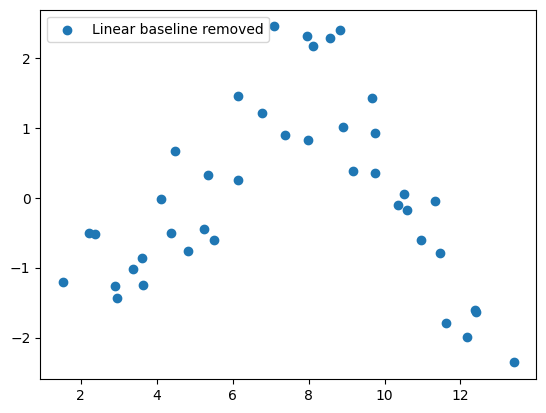

In [12]:
#subtracting the best fit function from the data and ploting it

fit = np.polyfit(x_inter, y_inter, 1)
linear_baseline = np.poly1d(fit) # create the linear baseline function
y_inter = y_inter - linear_baseline(x_inter) # subtract the baseline from y_inter

plt.scatter(x_inter, y_inter, label='Linear baseline removed')
plt.legend()
plt.show()